In [30]:
# Import essential libraries
import numpy as np  # For linear algebra operations
import pandas as pd  # For data processing and reading CSV files
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced data visualization
import re  # For regular expressions operations
from nltk.corpus import stopwords  # For removing stopwords from text data
from sklearn.preprocessing import LabelEncoder  # For encoding labels
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
from sklearn.neighbors import KNeighborsClassifier  # For the KNN classifier
from sklearn.metrics import accuracy_score  # For evaluating model accuracy
import pickle

In [31]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.sample(5)

,Category,Resume
499,Electrical Engineering,Education Details \r\nJuly 2016 to May 2019 BE...
425,Business Analyst,TECHNOLOGICAL SKILLS â¦ Knowledge of Computer...
683,PMO,AREA OF EXPERTISE (PROFILE) Around 10 plus yea...
150,Web Designing,"Technical Skills Web Technologies: Angular JS,..."
250,Sales,Education Details \r\n Bachelor's \r\n Bache...


In [32]:
df.shape

(962, 2)

In [33]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

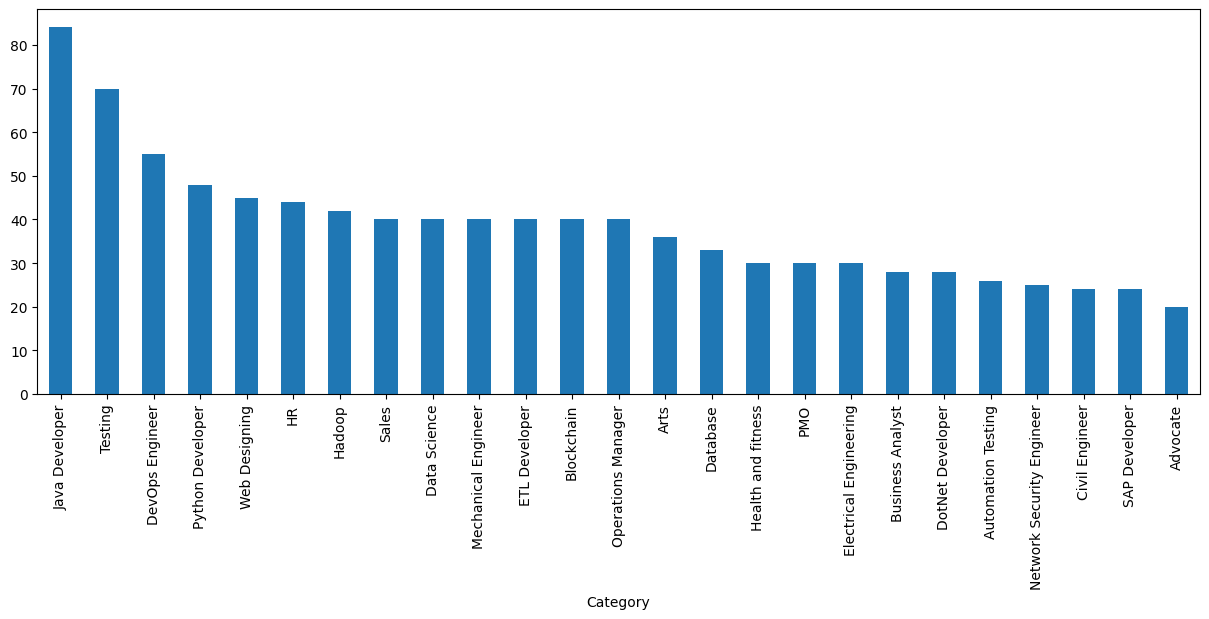

In [34]:
# Set the size of the plot
plt.figure(figsize=(15,5))

# Count the number of resumes in each category and plot a bar chart
df["Category"].value_counts().plot(kind="bar")

# Display the plot
plt.show()

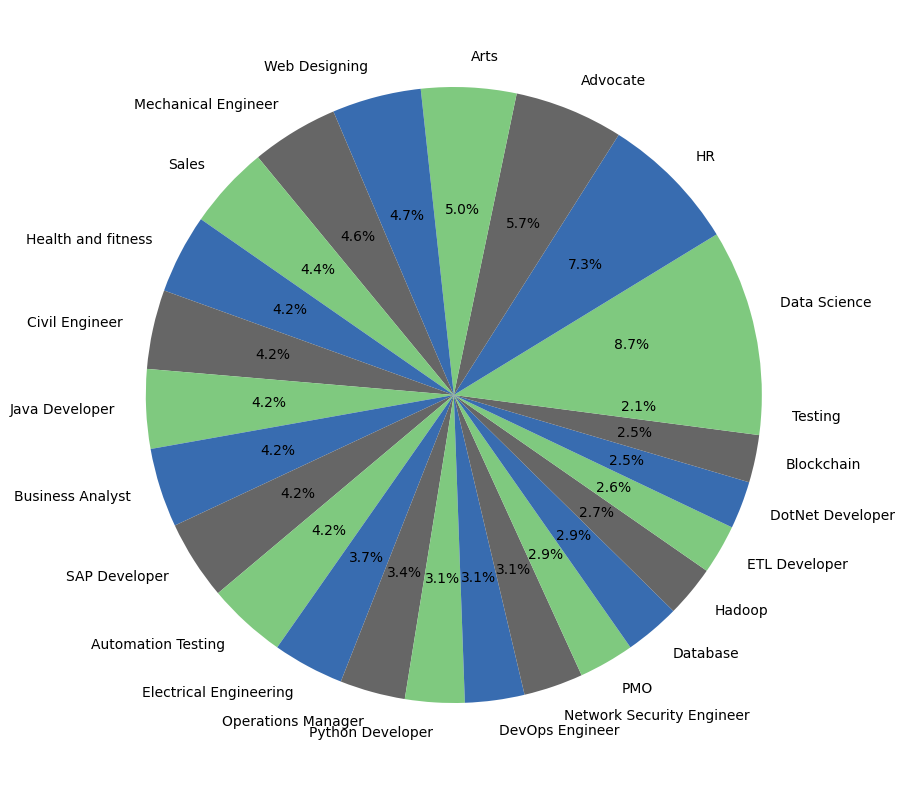

In [35]:
counts = df["Category"].value_counts()
labels = df["Category"].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=plt.cm.Accent(np.linspace(0,1,3)))
plt.show()

In [36]:
def clean(text):
    """
    Clean the input text by removing URLs, emails, special characters, and stop words.
    
    :param text: The string to be cleaned
    :return: The cleaned string
    """

    # Compile patterns for URLs and emails to speed up cleaning process
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
    
    # Remove URLs
    clean_text = url_pattern.sub('', text)
    
    # Remove emails
    clean_text = email_pattern.sub('', clean_text)
    
    # Remove special characters (keeping only words and whitespace)
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    
    # Remove stop words by filtering the split words of the text
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    
    return clean_text

In [37]:
string = "Hello, $ % # I found this # article at https://www.example.com! You can contact me at john@example.com."
print(clean(string))

Hello found article contact


In [38]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [39]:
df["Resume"] = df["Resume"].apply(lambda x: clean(x))

In [40]:
df["Resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

In [41]:
# Initialize the Label Encoder
le = LabelEncoder()

# Fit the label encoder on the 'Category' column to learn the unique categories
le.fit(df["Category"])

# Transform the 'Category' column into encoded numerical values
df["Category"] = le.transform(df["Category"])

In [42]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [43]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit the TF-IDF vectorizer on the 'Resume' column to learn the vocabulary and IDF of the words
tfidf.fit(df["Resume"])

# Transform the 'Resume' texts into a sparse matrix of TF-IDF features
resume = tfidf.transform(df["Resume"])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(resume, df["Category"], test_size=0.2, random_state=42)

In [45]:
df["Category"].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [46]:
X_train.shape, y_train.shape

((769, 8017), (769,))

In [47]:
# Initialize the KNN classifier with default parameters
clf = KNeighborsClassifier()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the categories for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# The accuracy is a float representing the proportion of correct predictions
print(f'Accuracy of the KNN classifier on test set: {accuracy:.2f}')

Accuracy of the KNN classifier on test set: 0.98


In [ ]:
data_to_save = {
    'model': clf,
    'tfidf_vectorizer': tfidf
}

with open('model_and_tfidf (1).pkl', 'wb') as file:
    pickle.dump(data_to_save, file)